# TimeSeries Mooring Data - Quick Plot

From an erddap Dataset, specify the Mooring ID to get a quick plot of the data

In [2]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa

In [3]:
server_url = "http://akutan.pmel.noaa.gov:8081/erddap"
dataset_name = '1hr_gridded_Full_ckp12_record'
# dataset_name_2 = '1hr_gridded_Full_bs4_record'

In [4]:
xdf = xa.load_dataset(f'{server_url}/griddap/{dataset_name}')

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'par' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/mambaforge/envs/p312/lib/python3.12/si

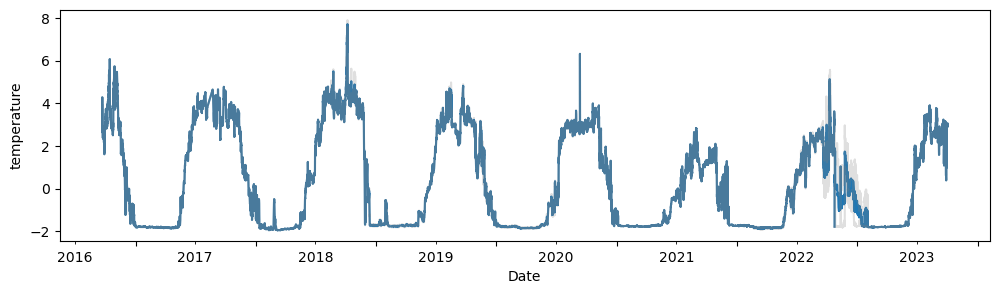

In [42]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(1,figsize=(12, 3),sharex=True)
xdf.sel({'depth':slice(46,60)}).temperature.mean(dim='depth').plot(ax=ax)
(xdf.sel({'depth':slice(46,60)}).temperature.mean(dim='depth')+xdf.sel({'depth':slice(46,60)}).temperature.std(dim='depth')).plot(c='grey',alpha=.25,ax=ax)
(xdf.sel({'depth':slice(46,60)}).temperature.mean(dim='depth')-xdf.sel({'depth':slice(46,60)}).temperature.std(dim='depth')).plot(c='grey',alpha=.25,ax=ax)

ax.xaxis.set_major_locator(MonthLocator(bymonth=1))
ax.xaxis.set_minor_locator(MonthLocator(bymonth=7))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

In [ ]:
## uncomment to export data
# xdf.temperature.mean(dim='depth').to_dataframe().to_csv('CKP2A_bottomtemp.csv')

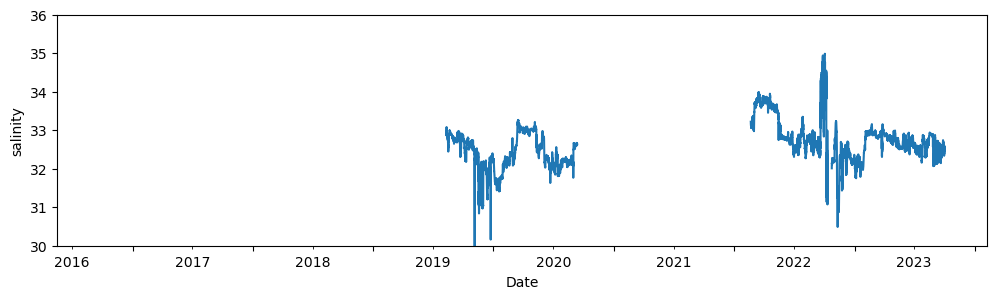

In [51]:
fig, ax = plt.subplots(1,figsize=(12, 3),sharex=True)

xdf.salinity.mean(dim='depth').plot(ax=ax)
xdf.where(~np.isnan(xdf.salinity),0).mean(dim='depth').salinity.plot(ax=ax)

ax.set_ylim([30,36])
ax.xaxis.set_major_locator(MonthLocator(bymonth=1))
ax.xaxis.set_minor_locator(MonthLocator(bymonth=7))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

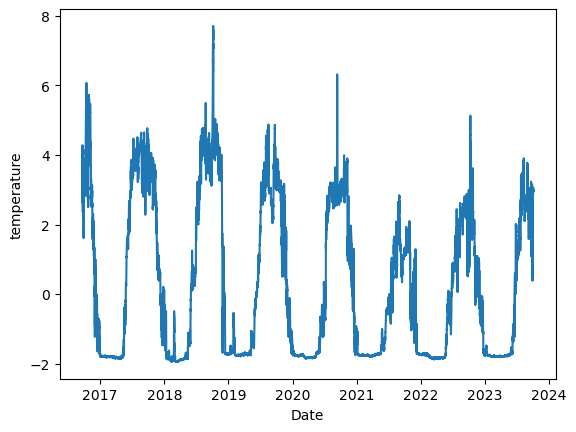

In [54]:
xdf.sel({'depth':slice(46,54)}).temperature.mean(dim='depth').plot()


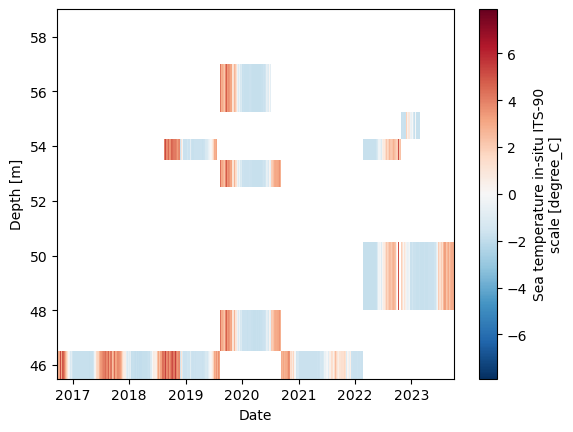

In [52]:
xdf.sel({'depth':slice(46,60)}).temperature.plot()